1. Data set reference link: https://www.consumerfinance.gov/data-research/consumer-complaints/#download-the-data
File data source: https://files.consumerfinance.gov/ccdb/complaints.csv.zip
Problem statement:
Download the data from the file data source and provide possible data insights.

In [33]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
#Importing library
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
#Here located in the current directory
file_path = r"C:\Users\Sivashankar murugan\Desktop\complaints.csv"
df = pd.read_csv(file_path, low_memory=False)


In [32]:
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-01-23,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",ME,04005,NaN,Consent not provided,Web,2024-01-23,Closed with non-monetary relief,Yes,NaN,8206605
1,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33311,NaN,Other,Web,2024-01-24,Closed with non-monetary relief,Yes,NaN,8211390
2,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,175XX,NaN,Other,Web,2024-01-24,Closed with non-monetary relief,Yes,NaN,8211362
3,2024-01-23,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair Credit Reporting a...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,79907,NaN,Consent provided,Web,2024-01-23,Closed with non-monetary relief,Yes,NaN,8210433
4,2024-01-23,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,I have observed several deviations from mandat...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,10075,NaN,Consent provided,Web,2024-01-23,Closed with non-monetary relief,Yes,NaN,8209430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5134962,2023-08-02,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",TX,76036,NaN,Other,Web,2023-08-02,Closed with non-monetary relief,Yes,NaN,7337991
5134963,2023-08-02,"Payday loan, title loan, or personal loan",Installment loan,Problem with additional add-on products or ser...,NaN,NaN,NaN,NBT BANCORP INC.,NJ,08046,NaN,NaN,Phone,2023-08-02,Closed with explanation,Yes,NaN,7343156
5134964,2023-08-02,Mortgage,FHA mortgage,Struggling to pay mortgage,NaN,NaN,Company believes it acted appropriately as aut...,Chesmar Homes,TX,77316,NaN,Other,Web,2023-08-17,Closed with explanation,Yes,NaN,7340709
5134965,2023-08-02,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",GA,30013,NaN,Consent not provided,Web,2023-08-02,Closed with explanation,Yes,NaN,7341166


In [18]:
len(df)

5134967

In [19]:
#Explore the data type
print(df.shape)
df.info()

(5134967, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5134967 entries, 0 to 5134966
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memo

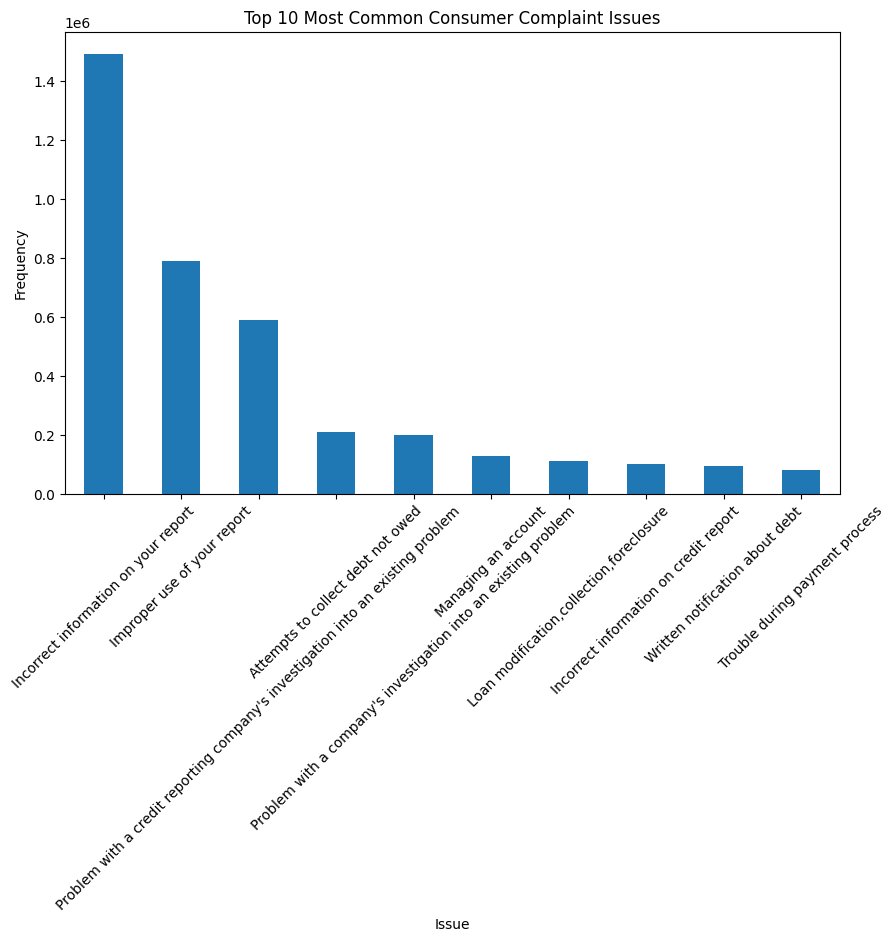

In [111]:
# Distribution of different issues
issue_distribution = df['Issue'].value_counts().head(10)

# Plot a bar chart
plt.figure(figsize=(10, 6))
issue_distribution.plot(kind='bar')
plt.title('Top 10 Most Common Consumer Complaint Issues')
plt.xlabel('Issue')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


The bar chart guides resource allocation by revealing top consumer complaints.
Issue frequency insights inform effective decision-making and resource allocation.
Identifying high-frequency issues drives quality enhancements for improved satisfaction.
Issue distribution analysis uncovers process improvement opportunities.
Proactive resolution fosters trust and loyalty, bolstering customer engagement.

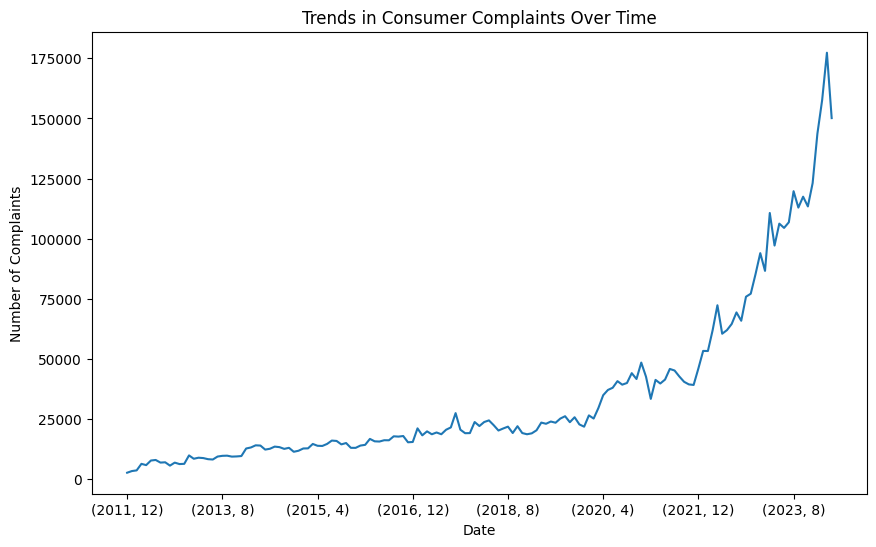

In [112]:
# Convert 'Date received' column to datetime
df['Date received'] = pd.to_datetime(df['Date received'])

# Extract year and month
df['Year'] = df['Date received'].dt.year
df['Month'] = df['Date received'].dt.month

# Group by year and month and count complaints
complaints_over_time = df.groupby(['Year', 'Month']).size()

# Plot a line chart
plt.figure(figsize=(10, 6))
complaints_over_time.plot()
plt.title('Trends in Consumer Complaints Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.show()


The chart displays how the volume of consumer complaints fluctuates over time, showcasing any discernible patterns or trends.
By observing peaks and troughs in the line, one can identify potential seasonal variations in complaint frequency, such as higher complaint rates during certain months or periods.
The overall direction of the line indicates long-term trends in complaint volumes, whether they are increasing, decreasing, or remaining relatively stable over time.
Anomalies or Outliers: Sudden spikes or drops in the line may indicate exceptional events or issues that significantly impact complaint volumes during specific periods.
Insights for Action: Stakeholders can use this chart to identify periods of high complaint activity and investigate underlying causes, enabling proactive measures to address consumer concerns and improve service quality over time.

<Figure size 1200x800 with 0 Axes>

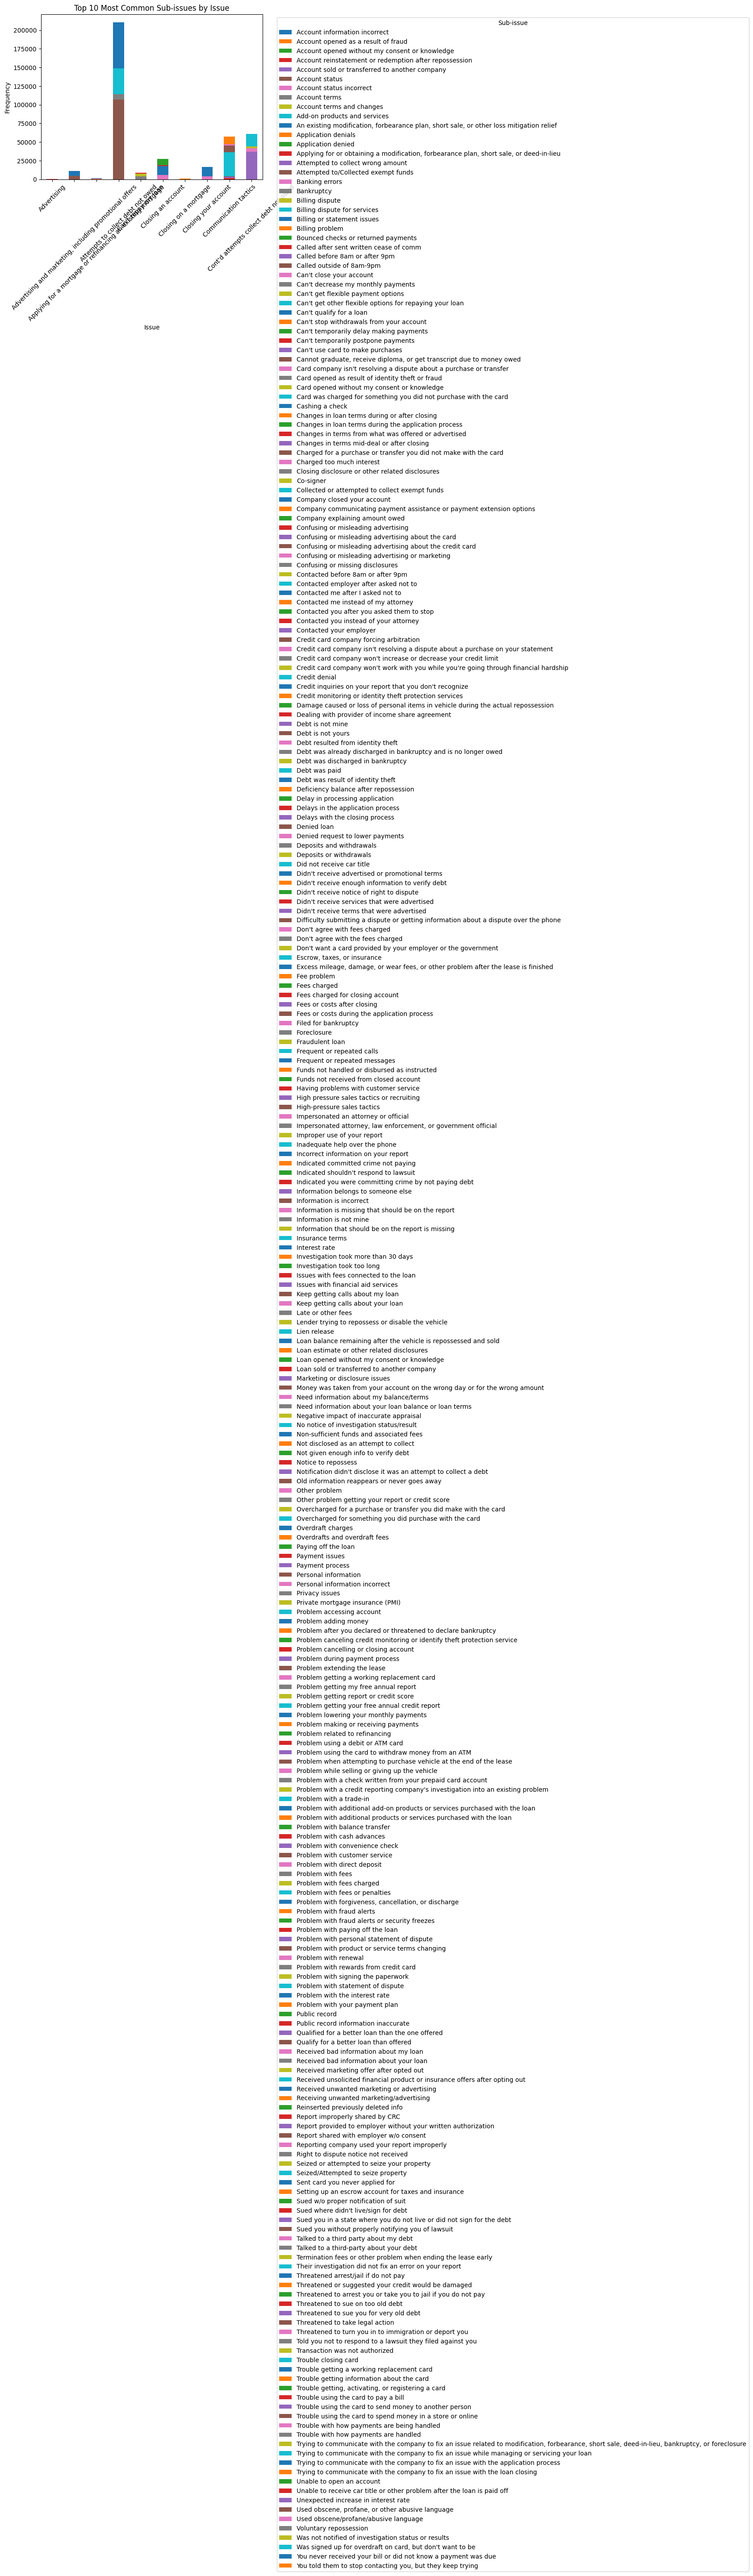

In [113]:
# Group by issue and sub-issue and count complaints
issue_sub_issue_counts = df.groupby(['Issue', 'Sub-issue']).size().unstack(fill_value=0)

# Plot a stacked bar chart
plt.figure(figsize=(12, 8))
issue_sub_issue_counts.head(10).plot(kind='bar', stacked=True)
plt.title('Top 10 Most Common Sub-issues by Issue')
plt.xlabel('Issue')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Sub-issue', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Each bar depicts a distinct issue, while its segments portray various sub-issues associated with that particular main issue.
Sub-issue lengths within each main issue demonstrate varying frequencies, with longer segments indicating higher occurrence rates for specific sub-issues.
The x-axis bars readily reveal the most prevalent consumer complaints, aiding in main issue identification.
The chart elucidates sub-issue distribution within main issue categories, offering insights into consumer challenges and concerns within broader categories.
The chart aids stakeholders in identifying prevalent sub-issues within main categories, facilitating targeted efforts to improve consumer satisfaction and service quality.

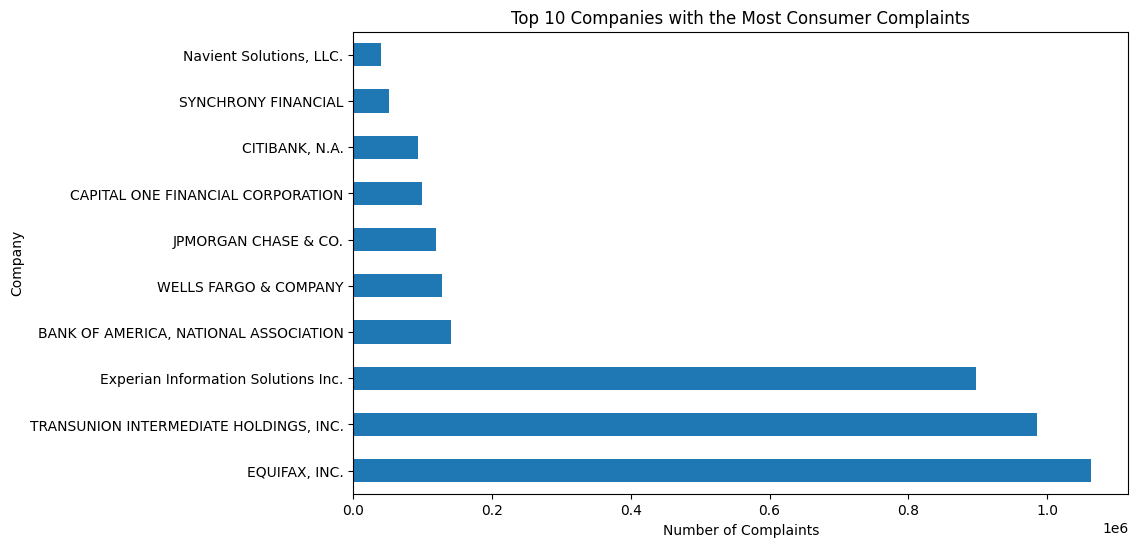

In [114]:
# Complaint volume by company
company_complaints = df['Company'].value_counts().head(10)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
company_complaints.plot(kind='barh')
plt.title('Top 10 Companies with the Most Consumer Complaints')
plt.xlabel('Number of Complaints')
plt.ylabel('Company')
plt.show()


The companies are ranked by the number of complaints, with the highest complaint volume at the top.
Bar length visually represents complaint volume, facilitating quick comparison among companies, with longer bars indicating higher complaint counts.
The chart enables easy identification of companies with the highest and lowest complaint volumes.
The chart offers insight into consumer satisfaction and service quality by highlighting companies facing potential issues through higher complaint volumes, indicating potential dissatisfaction.
The chart facilitates benchmarking for companies, aiding regulatory bodies and consumer advocacy groups in monitoring marketplace issues.

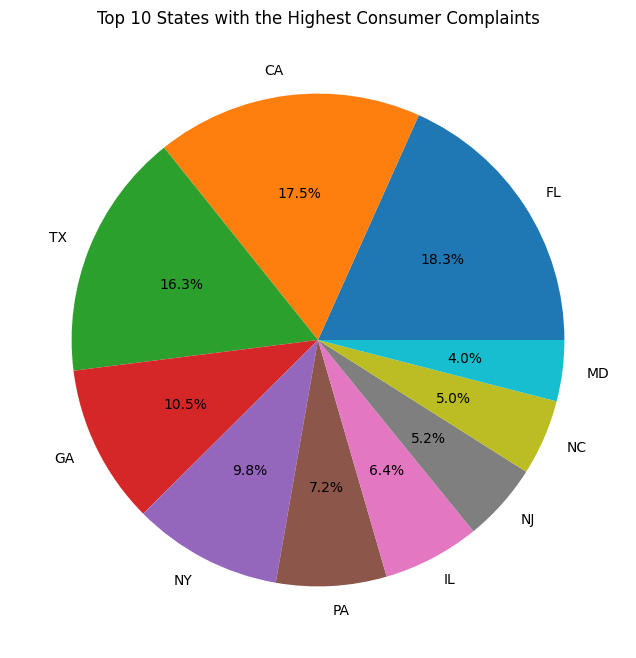

In [116]:
# Distribution of complaints by state
state_distribution = df['State'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
state_distribution.head(10).plot(kind='pie', autopct='%1.1f%%', fontsize=10)
plt.title('Top 10 States with the Highest Consumer Complaints')
plt.ylabel('')
plt.show()


Pie chart visualizes top 10 states by consumer complaints, derived from 'State' column's value counts in DataFrame.
Pie slices represent complaint proportions per state, formatted with one decimal place using autopct='%1.1f%%'.
Pie chart visually shows complaint distribution among top 10 states; larger slices indicate higher complaint volumes.
Pie chart allows easy comparison of each state's contribution to total complaints, highlighting states with more significant shares in the top10
Pie chart aids stakeholders in pinpointing states with highest complaint volumes, facilitating focused attention on pertinent consumer issues.

In [117]:
df['Submitted via'].unique()

array(['Web', 'Postal mail', 'Referral', 'Phone', 'Fax', 'Web Referral',
       'Email'], dtype=object)

<Figure size 1200x800 with 0 Axes>

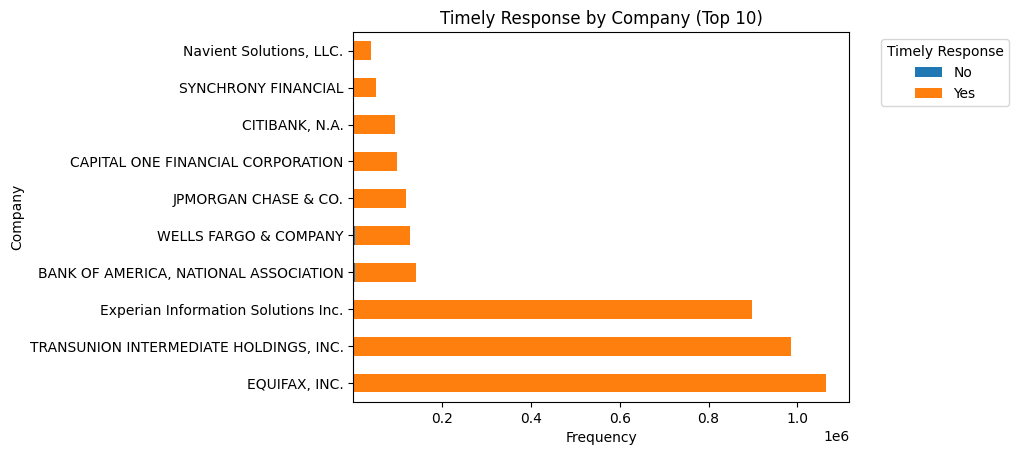

In [29]:
# Group by 'Company' and 'Timely Response' and calculate the size of each group
timely_response_counts = df.groupby(['Company', 'Timely response?']).size().unstack(fill_value=0)

# Sort by the sum of timely and untimely responses
timely_response_counts['Total'] = timely_response_counts.sum(axis=1)
timely_response_counts = timely_response_counts.sort_values(by='Total', ascending=False).head(10)
timely_response_counts.drop('Total', axis=1, inplace=True)

# Plot a horizontal bar chart
plt.figure(figsize=(12, 8))
timely_response_counts.plot(kind='barh', stacked=True)
plt.title('Timely Response by Company (Top 10)')
plt.xlabel('Frequency')
plt.ylabel('Company')
plt.legend(title='Timely Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The code groups and reshapes DataFrame by 'Company' and 'Timely response?', calculating group sizes.
The code computes total responses per company, sorting by this sum to find the top 10 companies.
The code utilizes Matplotlib to create a horizontal stacked bar chart of timely and untimely responses for the top 10 companies, with specified labels and legend.
Legend indicates timely vs. untimely responses, positioned outside plot to prevent overlap.

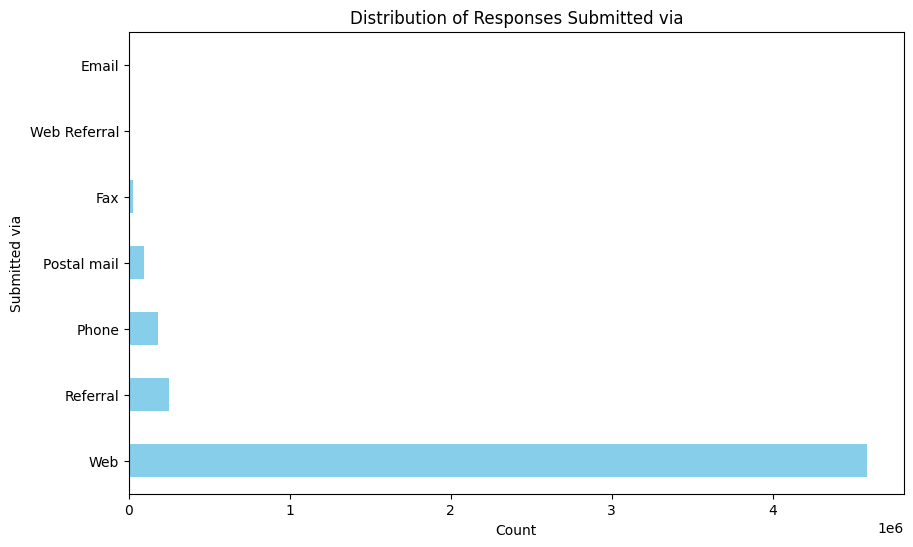

In [31]:
# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
submitted_via_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of Responses Submitted via')
plt.xlabel('Count')
plt.ylabel('Submitted via')
plt.show()

Each bar represents a specific channel through which responses are submitted, allowing for a comparison of the distribution of responses across different channels.
The length of the bars indicates the frequency of responses submitted via each channel, with longer bars representing higher submission counts for that particular channel.
It's easy to identify which channels are most commonly used by consumers to submit responses, as they are represented by the bars on the y-axis.
The chart provides insights into consumers' preferred communication channels for submitting responses, which can inform companies about where to focus their efforts for effective communication with consumers.
Companies can use this information to assess the effectiveness of different communication channels and identify potential areas for improvement in their response submission processes.

2. Given an unsorted array of integers, find the length of the longest continuous increasing subsequence (subarray).

Example 1: Input: [1,3,5,4,7] Output: 3

Example 2: Input: [2,2,2,2,2] Output: 1

In [43]:
a=[1,3,5,4,7]
n=len(a)
substr=[]
length=1
for i in range(0,n-1):
  if a[i]<a[i+1]:
    length+=1
  else:
    substr.append(length)
    length=1
substr.append(length)
print(max(substr))

3


In [42]:
a=[2,2,2,2,2]
n=len(a)
substr=[]
length=1
for i in range(0,n-1):
  if a[i]<a[i+1]:
    length+=1
  else:
    substr.append(length)
    length=1
substr.append(length)
print(max(substr))

1


3. Given a list of non negative integers, arrange them such that they form the largest number.

Example 1:

Input: [10,2] Output: "210" Example 2:

Input: [3,30,34,5,9] Output: "9534330"

In [45]:
input1 = [10, 2]
input2 = [3, 30, 34, 5, 9]
input1 = [str(num) for num in input1]
input2 = [str(num) for num in input2]
input1.sort(key=lambda x: (x * 4)[:4], reverse=True)
input2.sort(key=lambda x: (x * 4)[:4], reverse=True)
output1 = ''.join(input1)
output2 = ''.join(input2)

print("Output for Example 1:", output1)
print("Output for Example 2:", output2)


Output for Example 1: 210
Output for Example 2: 9534330


4. Store all the "servlet-name", and "servlet-class" to a csv file from the attached sample_json.json file using Python.

In [ ]:
import json
import csv

In [34]:
#local file path directory
pd.read_json(r"C:\Users\Sivashankar murugan\Downloads\DT A1 sample_json.json")

,web-app
servlet,"[{'servlet-name': 'cofaxCDS', 'servlet-class':..."
servlet-mapping,"{'cofaxCDS': '/', 'cofaxEmail': '/cofaxutil/ae..."
taglib,"{'taglib-uri': 'cofax.tld', 'taglib-location':..."


In [35]:
# Read data from JSON file
data = pd.read_json(r"C:\Users\Sivashankar murugan\Downloads\DT A1 sample_json.json")

In [36]:
# Extract "servlet-name" and "servlet-class" from each item in the JSON
servlet_data = [(servlet['servlet-name'], servlet['servlet-class']) 
for servlet in data['web-app']['servlet']]

In [ ]:
# Write to CSV file
with open('servlet_data.csv', 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    # Write headers
    writer.writerow(['servlet-name', 'servlet-class'])
    # Write data
    writer.writerows(servlet_data)

print("CSV file created successfully.")